# Exponential and logistic growth models

## Exponential models

We previously introduced the idea that some systems grow in proportion to the size $N$ of the system (e.g. a bank account with compound interest, or a disease pandemic). Such systems can be described by the differential equation

\begin{equation}  \frac{dN}{dt} = k N  \tag{Equation 1} \end{equation}   

which can be re-written in equivalent form

\begin{equation}  \frac{dN}{N} = k dt = \frac{dt}{T} \end{equation} 

where $k$ is the growth constant (e.g. bank interest rate) or equivalently $T=\frac{1}{k}$ is a characteristic time for the system.

We can make a subsitition 

\begin{equation} y = \ln(N) \end{equation}
differentiating
\begin{equation} \frac{dy}{dN} = \frac{1}{N} \end{equation} 

\begin{equation} d\ln(N) = \frac{dN}{N} \end{equation} 

Substitution leads to

\begin{equation}  \frac{dy}{dt} = k  \end{equation} 

If $k=\frac{1}{T}$ is a constant

\begin{equation} y = C_0 + k t \end{equation}

**Important:** A plot of $y=\ln(N)$ against $x=t$ is a straight line with gradient $k$.  
**This is how to find the growth constant $k$ in an exponential growth scenario.**  

In the more complex case that $k$ is a function of $t$, we can plot $y=\ln(N)$ against $x=t$  to find a polynomial model for $k(t)$. 

To transform back from $y$ to $N$, we use the inverse of the $\ln()$ function, which is $\exp()$, applied to both sides of the equation.  

## Logistic growth

Exponential growth cannot continue indefinitely. There are hard barriers to growth: limits of raw materials and space to grow into usually cause growth processes to level out at some maximum "carrying capacity".  

Verhulst (1838) read Thomas Malthus (1798) "An Essay on the Principle of Population" and derived his **logistic equation** to describe the self-limiting growth of a biological population constrained by available resources (e.g. humans on Earth, or bacteria in a small dish). It has been used to describe many growth processes that are limited by some maximum value. It is only a slight variation on the exponential growth equation (Equation 1).

\begin{equation}  \frac{dN}{dt} = k N \left(1 - \frac{N}{P} \right) \tag{Equation 2} \end{equation} 

$P$ is the "carrying capacity" of the system, or maximum sustainable population, and $k$ is the growth rate parameter (same as Equation 1). At small populations ($N<<P$), growth is nearly exponential (the second term is approximately 1 and so Equation 2 becomes very close to Equation 1), but the population stabilises and growth becomes very small if the population approaches the carrying capacity ($N \rightarrow P$). If the population gets above the carrying capacity, then it self-corrects (growth becomes negative).

If $P$ and $k$ are constants, then the logistic differential equation has analytical solution

\begin{equation} N = \frac{P}{1 + \left( \frac{P-N_0}{N_0}  \right) \exp(-kt)} \end{equation} 

Where $N_0$ is the population at $t=0$.

Let's define the function in code and take a look at it. Function definitions in code should have a good first comment that becomes the documentation for the code (spyder will help you with this).

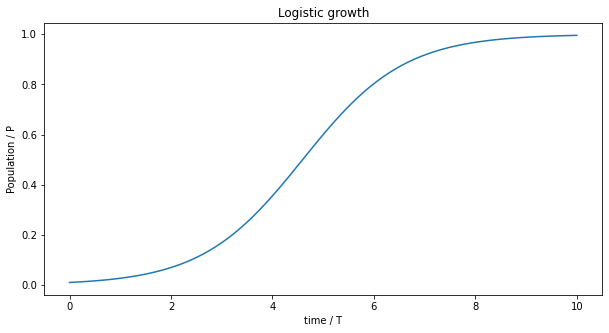

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def logisticGrowth(k,P,N0,t):
    '''
    Given the growth rate (k), carrying capacity (P), and initial population
    value (N0), generate an array of population (N) at various times (t), 
    based on analytical solution of the logistic growth equation. 
    Assumes k and P are not functions of t or N.

    Parameters
    ----------
    k : float
        Growth rate parameter.
    P : float
        Carrying capacity.
    N0 : float
        Initial population value (t=0).
    t : ndarray
        Time array.

    Returns
    -------
    N : ndarray
        Population value at time t

    '''
    return P / (1 + ((P-N0)/N0)*np.exp(-k*t))

k  = 1
P  = 1
N0 = 0.01
time = np.linspace(0,10,100)
value = logisticGrowth(k,P,N0,time)

plt.figure(figsize=[10,5])
plt.title('Logistic growth')
plt.plot(time,value)
plt.xlabel('time / T')
plt.ylabel('Population / P')
plt.show()

This S-shaped curve of growth is common in biology, epidemiology, and more generally in the "diffusion of innovations". The first part of the curve is exponential, but it then becomes linear and then tends to a constant maximum value. It is well-established that this is the general pattern observed as new technologies grow and replace older ones (paint, music recording, transport, etc.). Once a technology has totally replaced the old one, there is no longer any space to grow into. We will use this general idea to model the energy transition that is inevitable over coming decades. Technologies like solar and wind will replace fossil fuels.

Rogers, E. M., Singhal, A., & Quinlan, M. M. (2014). Diffusion of innovations. In: An integrated approach to communication theory and research (pp. 432-448). Routledge.  

See e.g. https://en.wikipedia.org/wiki/Diffusion_of_innovations

Malthus (1798) speculated that human population would follow a logistic curve. Let's look again at the human population statistics and the UN prediction for how it will change this century. Let's compare with the hypothesis of Malthus from >200 years earlier.

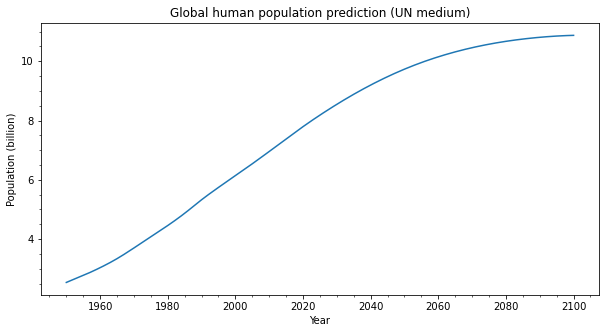

In [2]:
filename = '../data/world-population/UN2019-population-projection-world-Medium.csv'

t,N = np.loadtxt(filename,usecols=(0,1),skiprows=1,unpack=True,delimiter=',')

# Convert to billions (units in thousands in data file)
N = N/1e6

plt.figure(figsize=[10,5])
plt.minorticks_on()
plt.title('Global human population prediction (UN medium)')
plt.xlabel('Year')
plt.ylabel('Population (billion)')
plt.plot(t,N)
plt.show()

The UN prediction on the face of it looks like it might be following a logistic model.

## Logistic growth as a special case of a polynomial model

Consider a dataset that you speculate has logistic growth and you wish to test that hypothesis and find model parameters that describe it. The problem can be solved as a special case of a polynomial model. Consider the substition

\begin{equation}  z = \frac{1}{N}\frac{dN}{dt} = \frac{d\ln(N)}{dt} \end{equation} 

We can rewrite the logistic equation

\begin{equation}  \frac{dN}{dt} = k N \left(1 - \frac{N}{P} \right) \end{equation} 

\begin{equation}  z = k  - \frac{k}{P}N  = C_0 + C_1 N\end{equation} 

A plot of $y=z$ against $x=N$ should be a straight line with intercept $C_0 = k$ and gradient $C_1 = -k/P$.  

So, let's look again at the UN medium prediction


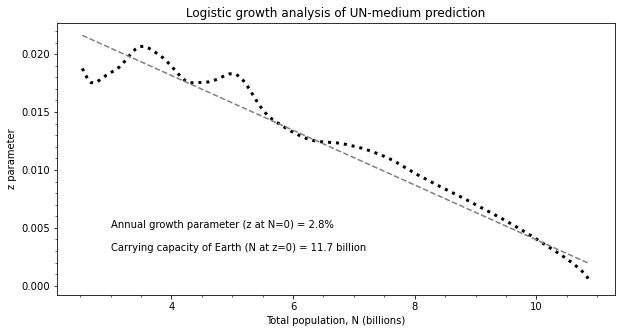

In [3]:
# annual data
dt = 1.
# use the gradient function to find incremental differences 
dN = np.gradient(N)
# construct the z statistic
z = (1/N)*(dN/dt)

# fit a straight line  
polynomialOrder = 1
modelParameters = np.polyfit(N,z,polynomialOrder)
C0 = modelParameters[1]
C1 = modelParameters[0]
k = C0
P = -k/C1
modelFunction = np.poly1d(modelParameters)
zModel = modelFunction(N)

#plot to verify 
plt.figure(figsize=[10,5])
plt.title('Logistic growth analysis of UN-medium prediction')
plt.minorticks_on()
plt.plot(N,z,color='black',linestyle=':',linewidth=3)
plt.plot(N,zModel,color='grey',linestyle='--')
# string formatting advice can be found here
# https://realpython.com/python-string-formatting/
plt.text(3,0.005,'Annual growth parameter (z at N=0) = {:.1f}%'.format(100*k))
plt.text(3,0.003,'Carrying capacity of Earth (N at z=0) = {:.1f} billion'.format(P))
plt.xlabel('Total population, N (billions)')
plt.ylabel('z parameter')
plt.show()


It seems that data since 1950 and the UN prediction to 2100 fit the hypothesis of Malthus (1798) remarkably well. The growth factor would be the initial annual rate of exponential growth. However, an analysis of data from 1700-1900 show initial growth was actually slower than this (<1%): technology and culture have changed underlying dynamics of the system as it has evolved.


## Your task: Diffusion of innovation

We live in a time of transition. A time when new technologies will spread through our society and change us. How fast will they spread? The logistic model has been shown to be a useful way of modeling this. Technology uptake is initially exponential, but eventually saturates at some maximum value that reflects natural limits on the size of the market.

If we can independently estimate the total size of the need ($P$) and we know the current rate of exponential growth ($k$), then we can construct a logistic growth model. Load data for battery electric vehicles (BEVs). Calculate the annual growth rate factor $k$ and assume that the market will be saturated when there are 1 billion cars. Assume that this will happen before electric cars start to die (i.e. ignore replacement needs for now). How long will it take to fully electrify the global car fleet?

If you would like to consider other technologies in a similar way, then find and model the data and present results in your project.

